In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
fire_df = pd.DataFrame(df)

In [3]:
fire_df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
fire_df.isnull().sum()
fire_df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Técnica utilizando diagrama de caixa para detecção de anomalias

In [6]:
def outliers(collum):
    q1 = np.percentile(fire_df[collum], 25)
    q2 = np.percentile(fire_df[collum], 50)
    q3 = np.percentile(fire_df[collum], 75)
    ri = np.subtract(q3,q1)
    k = 1.5

    li = q1 - (k * ri) 
    ls = q3 + (k * ri)

    outliers_inf_dmc = fire_df[(fire_df[collum] < li)].count()
    outliers_sup_dmc = fire_df[(fire_df[collum] > ls)].count()

    return outliers_inf_dmc[collum] + outliers_sup_dmc[collum]

Total de outliers para o atributo DC: 8


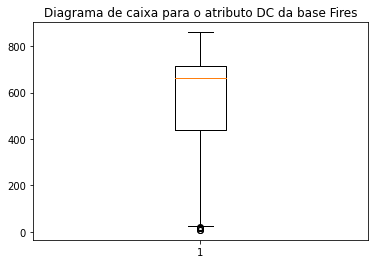

In [7]:
plt.boxplot(fire_df['DC'], showfliers=True)
plt.title('Diagrama de caixa para o atributo DC da base Fires')
print('Total de outliers para o atributo DC:', outliers('DC'))


Total de outliers para o atributo DMC: 17


Text(0.5, 1.0, 'Diagrama de caixa para o atributo DMC da base Fires')

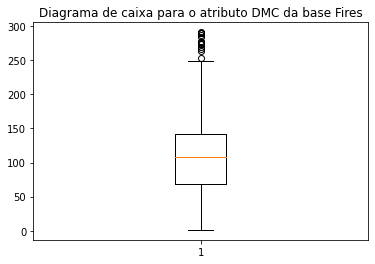

In [8]:
print('Total de outliers para o atributo DMC:', outliers('DMC'))
plt.boxplot(fire_df['DMC'], showfliers=True)
plt.title('Diagrama de caixa para o atributo DMC da base Fires')


Total de outliers para o atributo ISI: 23


Text(0.5, 1.0, 'Diagrama de caixa para o atributo ISI da base Fires')

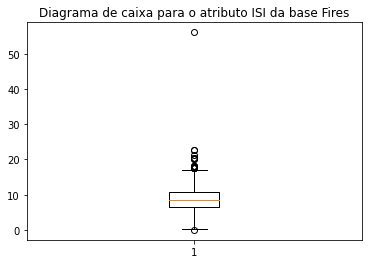

In [9]:
print('Total de outliers para o atributo ISI:', outliers('ISI'))
plt.boxplot(fire_df['ISI'], showfliers=True)
plt.title('Diagrama de caixa para o atributo ISI da base Fires')

Total de outliers para o atributo RH: 12


Text(0.5, 1.0, 'Diagrama de caixa para o atributo RH da base Fires')

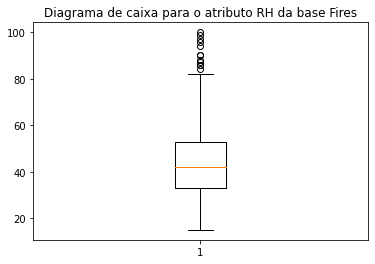

In [10]:
print('Total de outliers para o atributo RH:', outliers('RH'))
plt.boxplot(fire_df['RH'], showfliers=True)
plt.title('Diagrama de caixa para o atributo RH da base Fires')

Técnica utilizando Regressão Linear com PCA

In [11]:
from pyod.models.pca import PCA

In [12]:
detector = PCA()
detector.fit(np.array(fire_df.iloc[:, 4:10]))
previsoes = detector.labels_
confianca_previsoes = detector.decision_scores_

In [13]:
outliers = []
for i in range(len(previsoes)):
    if previsoes[i] == 1:
        outliers.append(i)

In [14]:
lista_outliers = fire_df.iloc[outliers, :]

In [15]:
print('Total de outliers encontrados na base', lista_outliers['DMC'].count())

Total de outliers encontrados na base 52
